In [3]:
import os
import time
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler


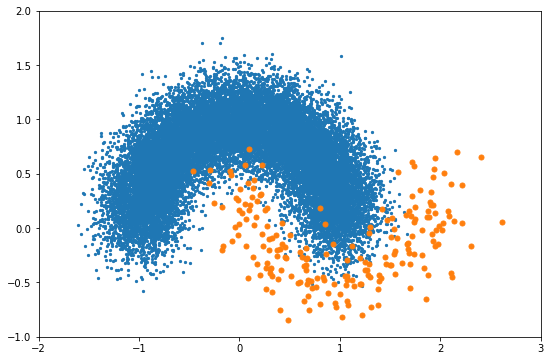

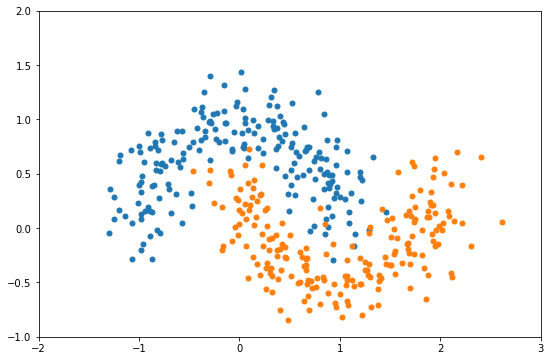

In [43]:
# config

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2





RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=train_size, test_size=test_size)


fig = plt.figure(figsize=(9, 6))
plt.ylim(-1,2)
plt.xlim(-2,3)
plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=20)
plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_moon.pdf", bbox_inches='tight')
plt.show()


rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

fig = plt.figure(figsize=(9, 6))
plt.ylim(-1,2)
plt.xlim(-2,3)
plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_moon_subsample.pdf", bbox_inches='tight')
plt.show()

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,


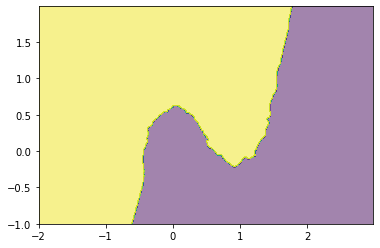

In [50]:
n_estimators = 1

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 1, 10,  0.8
    
base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier = BalancedBaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=n_estimators,
    max_samples=max_samples,
    max_features=1.0,
    bootstrap=False,
    bootstrap_features=False,
    sampling_strategy='not minority',
    replacement=False,
    random_state=random_seed)
classifier.fit(X, y)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,500)

_ = plt.contourf(axis0, axis1, 1-y_grid , 20,alpha = 0.5)



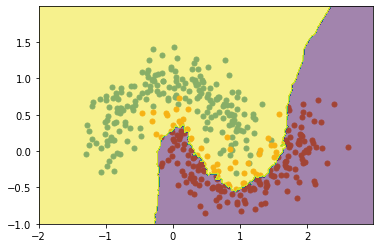

In [48]:
n_estimators = 1

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)

classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

classifier.fit(X, y)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,500)
plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)

_ = plt.contourf(axis0, axis1, 1-y_grid , 20,alpha = 0.5)
